# Inciso 6

### Algunas pruebas con operaciones morfológicas

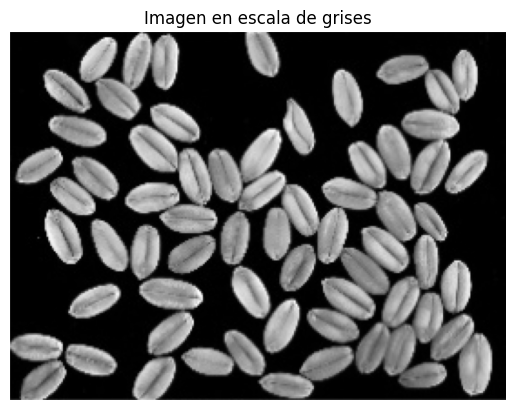

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('wheat.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def plot_img(img, title=""):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_img(gray, "Imagen en escala de grises")

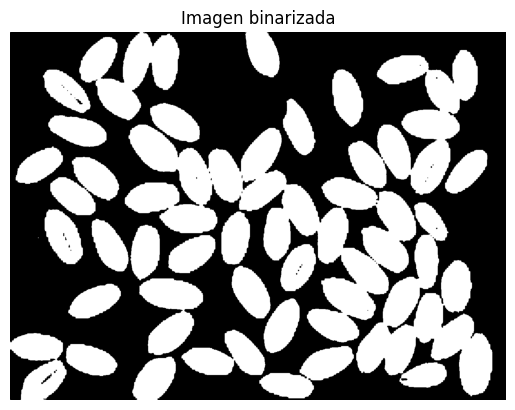

In [23]:
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_img(thresh, "Imagen binarizada")

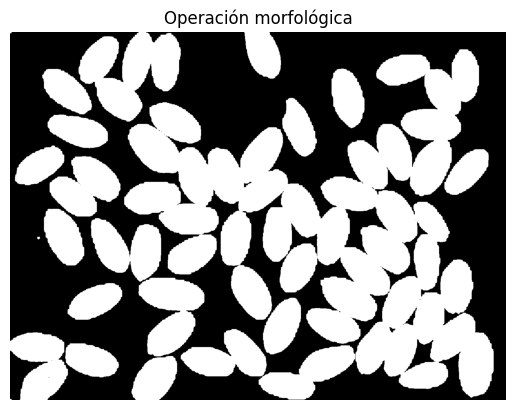

In [24]:

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
opening = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel, iterations=2)
plot_img(opening, "Operación morfológica")

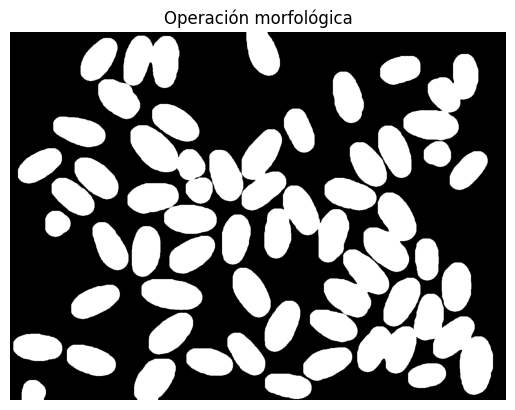

In [25]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30)) 
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plot_img(opening, "Operación morfológica")


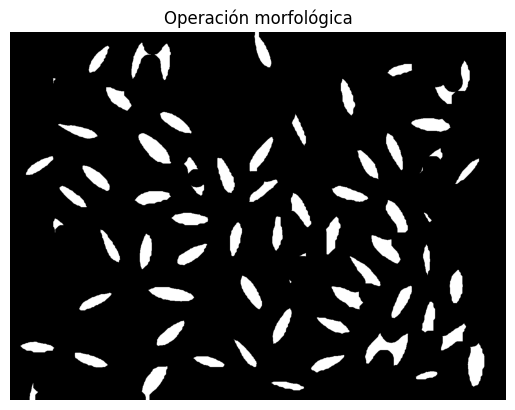

In [26]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (26, 26))  
opening = cv2.morphologyEx(thresh, cv2.MORPH_ERODE, kernel, iterations=2)
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)
plot_img(opening, "Operación morfológica")

### Resultado final 

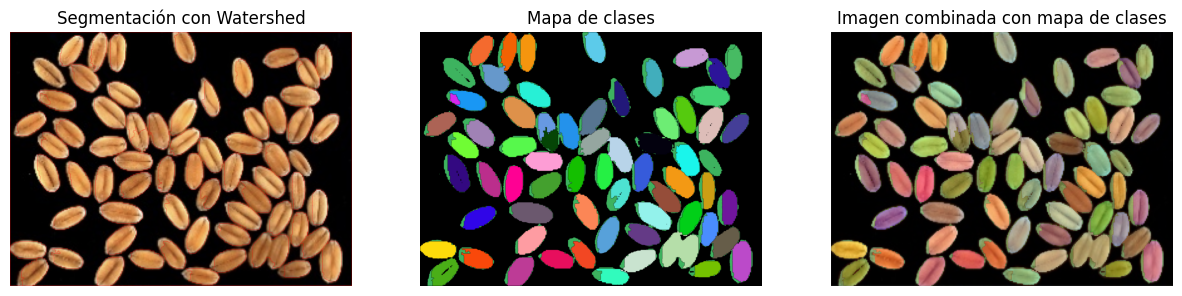

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('wheat.png')
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binaryImage = cv2.threshold(grayImage, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernelLarge = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 10))
openedImage = cv2.morphologyEx(binaryImage, cv2.MORPH_OPEN, kernelLarge, iterations=1)
kernelSmall = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 5))
openedImage = cv2.morphologyEx(openedImage, cv2.MORPH_ERODE, kernelSmall, iterations=2)

distanceTransform = cv2.distanceTransform(openedImage, cv2.DIST_L2, 0)
_, sureForeground = cv2.threshold(distanceTransform * 0.5, 0.15 * distanceTransform.max(), 255, 0)
sureForeground = np.uint8(sureForeground)
sureForeground = cv2.erode(sureForeground, kernelLarge, iterations=3)
sureBackground = cv2.dilate(openedImage, kernelLarge, iterations=3)
unknownRegions = cv2.subtract(sureBackground, sureForeground)

_, markers = cv2.connectedComponents(sureForeground)
markers = markers + 1
markers[unknownRegions == 255] = 0

cv2.watershed(image, markers)

watershedImage = image.copy()
watershedImage[markers == -1] = [0, 0, 255]

np.random.seed(42)
numMarkers = np.max(markers) + 1
colors = np.random.randint(0, 255, size=(numMarkers, 3), dtype=np.uint8)

classMap = np.zeros_like(image, dtype=np.uint8)
for label in range(1, numMarkers):
    classMap[markers == label] = colors[label]

backgroundMask = (binaryImage == 0) | (markers == 0) | (markers == -1)
classMap[backgroundMask] = [0, 0, 0]

alpha = 0.4
overlayImage = cv2.addWeighted(image, 1 - alpha, classMap, alpha, 0)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv2.cvtColor(watershedImage, cv2.COLOR_BGR2RGB))
ax[0].set_title("Segmentación con Watershed")
ax[0].axis("off")
ax[1].imshow(cv2.cvtColor(classMap, cv2.COLOR_BGR2RGB))
ax[1].set_title("Mapa de clases")
ax[1].axis("off")
ax[2].imshow(cv2.cvtColor(overlayImage, cv2.COLOR_BGR2RGB))
ax[2].set_title("Imagen combinada con mapa de clases")
ax[2].axis("off")

plt.show()
